In [2]:
# Importing essential Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline 

In [4]:
df = pd.read_csv('/Users/saifullah/Desktop/Data analysis/google-play-store-EDA/googleplaystore.csv')

# 1. Exploring Dataset

        Columns: 13

        Rows: 10841

In [5]:
df.shape

(10841, 13)

        General and Statistical Info:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [8]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


**Checking Missing Values**

'Rating' features has 1474 missing values.

In [9]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [10]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


# 2. Data Cleaning

**Data Cleaning Plan:**

1. **Handle Missing Values:** Fill or remove missing values in Rating, Type, Content Rating, Current Ver, and Android Ver.

2.  **Convert Data Types:**

    -       Convert Reviews to an integer.

    -       Convert Installs to an integer (removing + and ,).

    -       Convert Price to a float (removing $).

3. **Standardize Size Column:** Convert Size values to numeric MB format.

4. **Convert Last Updated to DateTime:** Ensure it is in a proper date format.

5. **

1. **Handle Missing Values**

In [29]:
# Make a copy of the original dataset to make changes 
df_copy = df.copy()
df_copy.isnull().sum()


App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [30]:
# Fill missing in categorical features with unknown
for col in ['Type', 'Content Rating', 'Current Ver', 'Android Ver']:
    df_copy[col].fillna('Unknown', inplace=True)

/var/folders/9h/wpyyhxf152d4bd7rz696bvtr0000gn/T/ipykernel_63520/1614895971.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy[col].fillna('Unknown', inplace=True)


In [32]:
# Fill missing Values in 'Rating' feature with the median rating 
df_copy['Rating'].fillna(df_copy['Rating'].median(), inplace=True)

/var/folders/9h/wpyyhxf152d4bd7rz696bvtr0000gn/T/ipykernel_63520/358827230.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy['Rating'].fillna(df_copy['Rating'].median(), inplace=True)


In [34]:
# Check for missing values 
df_copy.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

2. **Convert Data Types**
-       Convert Reviews to Integer
-       Convert 'Installs' to integer (removing '+' and ',')
-       Convert 'Price' to float (removing '$')

In [14]:
# Check the data type of 'Reviews' column
df['Reviews'].str.isnumeric().sum()

# There is a one record which is non-numneric
df[~df['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [60]:


# Drop the non_numeric 'Review' record by index
df_copy = df_copy.drop(df_copy.index[10472])
 

In [61]:
# Verify the dropped record
df_copy[~df_copy['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [62]:
# Convert 'Review' Data type to int
df_copy['Reviews'] = df_copy['Reviews'].astype(int)
df_copy['Reviews'].info()

<class 'pandas.core.series.Series'>
Index: 10840 entries, 0 to 10840
Series name: Reviews
Non-Null Count  Dtype
--------------  -----
10840 non-null  int64
dtypes: int64(1)
memory usage: 169.4 KB


In [ ]:
# Convert 'Installs' to integer (removing '+' and ',')
df_copy['Installs'] = df_copy['Installs'].str.replace('Free', '0', regex=True)
df_copy['Installs'] = df_copy['Installs'].str.replace('[+,]', '', regex=True).astype(int)

In [41]:
df_copy['Installs'].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,         50,        100,
              500,         10,          1,          5,          0])

In [46]:
# Convert 'Price' to float (removing '$')
df_copy['Price'].unique()
df_copy['Price'] = df_copy['Price'].str.replace('Everyone', '0.00', regex=True)
df_copy['Price'] = df_copy['Price'].str.replace('[$,]', '', regex=True).astype(float)

3. **Standardize 'Size' Column**

In [49]:
def convert_size(size):
    if size.endswith('M'):
        return float(size[:-1])
    elif size.endswith('K'):
        return float(size[:-1]) / 1024
    else:
        return np.nan

df_copy['Size'] = df_copy['Size'].apply(convert_size)

In [50]:
df_copy['Size'].unique()

array([ 19. ,  14. ,   8.7,  25. ,   2.8,   5.6,  29. ,  33. ,   3.1,
        28. ,  12. ,  20. ,  21. ,  37. ,   2.7,   5.5,  17. ,  39. ,
        31. ,   4.2,   7. ,  23. ,   6. ,   6.1,   4.6,   9.2,   5.2,
        11. ,  24. ,   nan,   9.4,  15. ,  10. ,   1.2,  26. ,   8. ,
         7.9,  56. ,  57. ,  35. ,  54. ,   3.6,   5.7,   8.6,   2.4,
        27. ,   2.5,  16. ,   3.4,   8.9,   3.9,   2.9,  38. ,  32. ,
         5.4,  18. ,   1.1,   2.2,   4.5,   9.8,  52. ,   9. ,   6.7,
        30. ,   2.6,   7.1,   3.7,  22. ,   7.4,   6.4,   3.2,   8.2,
         9.9,   4.9,   9.5,   5. ,   5.9,  13. ,  73. ,   6.8,   3.5,
         4. ,   2.3,   7.2,   2.1,  42. ,   7.3,   9.1,  55. ,   6.5,
         1.5,   7.5,  51. ,  41. ,  48. ,   8.5,  46. ,   8.3,   4.3,
         4.7,   3.3,  40. ,   7.8,   8.8,   6.6,   5.1,  61. ,  66. ,
         8.4,  44. ,   1.6,   6.2,  53. ,   1.4,   3. ,   5.8,   3.8,
         9.6,  45. ,  63. ,  49. ,  77. ,   4.4,   4.8,  70. ,   6.9,
         9.3,   8.1,


4. **Convert Last Updated to DateTime:** Ensure it is in a proper date format.

In [65]:
# Convert the Last Updated feature to a dateTime format
df_copy['Last Updated'] = pd.to_datetime(df_copy['Last Updated'])


In [69]:
# Extract Day, Month and Year 
df_copy['Day'] = df_copy['Last Updated'].dt.day
df_copy['Month'] = df_copy['Last Updated'].dt.month
df_copy['Year'] = df_copy['Last Updated'].dt.year

In [72]:
df_copy.to_csv('/Users/saifullah/Desktop/Data analysis/google-play-store-EDA/data/google_cleaned.csv')

# 3. EDA
                                                                        Summary Statistics:                                                                                                   
Understand key matrics for numerical columns.

In [76]:
# Uploading the cleaned dataset
df_clean = pd.read_csv('/Users/saifullah/Desktop/Data analysis/google-play-store-EDA/data/google_cleaned.csv')

In [75]:
df_clean.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018


In [77]:
# Summary Statistics 
df_clean.describe()

,Unnamed: 0,Rating,Reviews,Size,Installs,Price,Day,Month,Year
count,10840.000000,10840.000000,1.084000e+04,8829.000000,1.084000e+04,10840.000000,10840.000000,10840.000000,10840.000000
mean,5419.533948,4.206476,4.441529e+05,22.270540,1.546434e+07,1.027368,15.609041,6.422325,2017.399723
std,3129.439605,0.480342,2.927761e+06,22.628691,8.502936e+07,15.949703,9.561621,2.578388,1.100914
min,0.000000,1.000000,0.000000e+00,1.000000,0.000000e+00,0.000000,1.000000,1.000000,2010.000000
25%,2709.750000,4.100000,3.800000e+01,5.400000,1.000000e+03,0.000000,6.000000,5.000000,2017.000000
50%,5419.500000,4.300000,2.094000e+03,14.000000,1.000000e+05,0.000000,16.000000,7.000000,2018.000000
75%,8129.250000,4.500000,5.477550e+04,31.000000,5.000000e+06,0.000000,24.000000,8.000000,2018.000000
max,10840.000000,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000,31.000000,12.000000,2018.000000


                                                        Visualization and Correlation analysis                                                                                               
1. **Visualizing Data Distribution**
-               Rating Distribution (Histoghram)
-               Installs Distribution (Log Scale Histogram)
-               Price Distribution (Box Plot)


2. **Category-Wise Analysis**

-               Top 10 most popular categories by the number of installs.
-               Average rating by category.


3. **Correlation Analysis**

-               Relationship between Reviews, Installs, and Ratings.
-               Impact of Price on Installs.

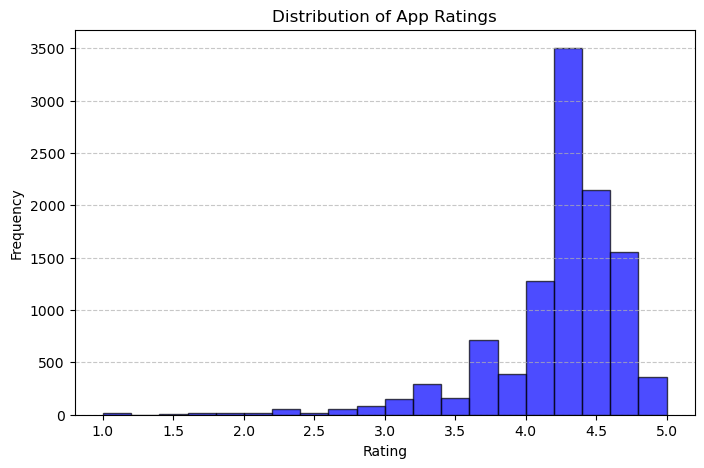

In [78]:
# Visualizing Data Distributions

# Plot 1: Rating Distribution
plt.figure(figsize=(8,5))
plt.hist(df_clean['Rating'], bins=20, color='blue', edgecolor = 'black', alpha=0.7)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title("Distribution of App Ratings")
plt.grid(axis='y', linestyle = '--', alpha = 0.7)
plt.show()

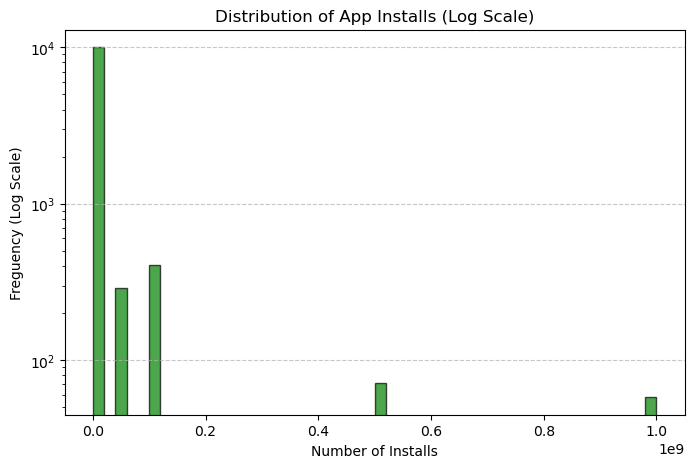

In [79]:
# Plot 2: Installs Distribution (Log Scale)
plt.figure(figsize=(8,5))
plt.hist(df_clean['Installs'], bins=50, color='green', edgecolor = 'black', alpha = 0.7, log = True)
plt.xlabel('Number of Installs')
plt.ylabel('Freguency (Log Scale)')
plt.title('Distribution of App Installs (Log Scale)')
plt.grid(axis='y', linestyle = '--', alpha = 0.7)
plt.show()

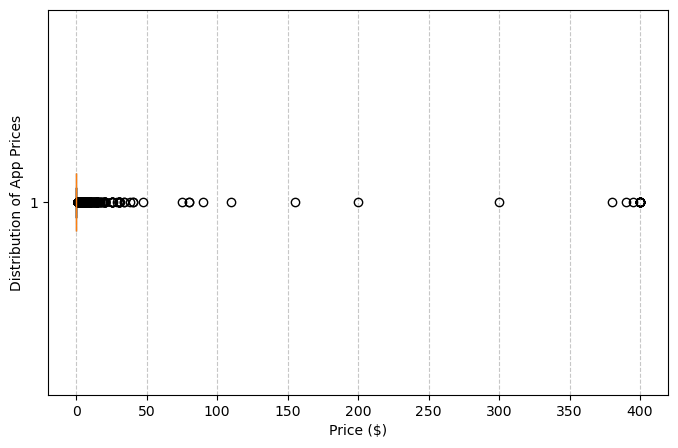

In [80]:
# Plot 3: Price Distribution (Box Plot)
plt.figure(figsize=(8,5))
plt.boxplot(df_clean['Price'], vert=False, patch_artist= True, boxprops=dict(facecolor = 'red', alpha = 0.5))
plt.xlabel('Price ($)')
plt.ylabel('Distribution of App Prices')
plt.grid(axis='x', linestyle = '--', alpha = 0.7)
plt.show()

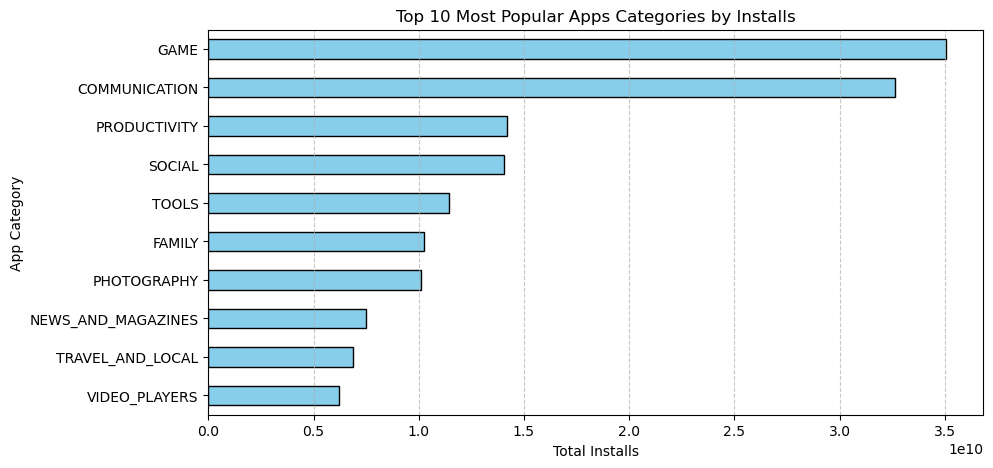

In [83]:
# Category Wise analysis

# Most Popular Apps by Categories by Installs

category_installs = df_clean.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
category_installs.sort_values().plot(kind='barh', color = 'skyblue', edgecolor = 'black')
plt.xlabel("Total Installs")
plt.ylabel("App Category")
plt.title("Top 10 Most Popular Apps Categories by Installs")
plt.grid(axis='x', linestyle = '--', alpha = 0.7)
plt.show()

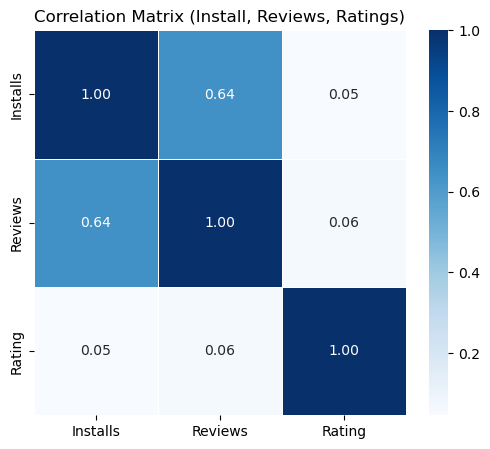

In [86]:
# Correlation Analysis: Relationship between Installs, Reviews, and Ratings

correlation_matrix = df_clean[['Installs', 'Reviews', 'Rating']].corr()
plt.figure(figsize=(6,5))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix (Install, Reviews, Ratings)')
plt.show()